# Case Study 2 : Data Mining in Yelp Data


Please download the Yelp dataset in Case Study 2 in BrightSpace. 

**Here is an example of the data format:**
### Business Objects

Business objects contain basic information about local businesses. The fields are as follows:

```json
{
  'type': 'business',
  'business_id': (a unique identifier for this business),
  'name': (the full business name),
  'neighborhoods': (a list of neighborhood names, might be empty),
  'full_address': (localized address),
  'city': (city),
  'state': (state),
  'latitude': (latitude),
  'longitude': (longitude),
  'stars': (star rating, rounded to half-stars),
  'review_count': (review count),
  'photo_url': (photo url),
  'categories': [(localized category names)]
  'open': (is the business still open for business?),
  'schools': (nearby universities),
  'url': (yelp url)
}
```
### Checkin Objects
```json
{
    'type': 'checkin',
    'business_id': (encrypted business id),
    'checkin_info': {
        '0-0': (number of checkins from 00:00 to 01:00 on all Sundays),
        '1-0': (number of checkins from 01:00 to 02:00 on all Sundays),
        ...
        '14-4': (number of checkins from 14:00 to 15:00 on all Thursdays),
        ...
        '23-6': (number of checkins from 23:00 to 00:00 on all Saturdays)
    }, # if there was no checkin for a hour-day block it will not be in the dict
}
```

# Problem: pick a data science problem that you plan to solve using Yelp Data
* The problem should be important and interesting, which has a potential impact in some area.
* The problem should be solvable using yelp data and data science solutions.

Please briefly describe in the following cell: what problem are you trying to solve? why this problem is important and interesting?

One of the problems I am trying to solve is how to effectively analyze and make sense of large datasets like the Yelp Business dataset of attributes.

The Yelp Business dataset is a rich and complex source of information about various businesses, including their attributes such as location, category, and ratings. Analyzing this dataset can provide valuable insights into consumer behavior, business trends, and customer preferences. For instance, by analyzing the attributes of businesses with high ratings, we can gain insights into what factors contribute to their success and use this information to improve the performance of other businesses. Similarly, we can analyze the attributes of businesses that receive negative ratings and use this information to identify areas of improvement.

Moreover, the importance of analyzing large datasets like the Yelp Business dataset extends beyond the business world. Governments, researchers, and other organizations can use this data to understand patterns and trends in the economy, public health, and other important areas of society. For instance, researchers can use this data to identify trends in consumer behavior, track the spread of diseases, and analyze the impact of policy changes on businesses and communities.

Overall, the analysis of large datasets like the Yelp Business dataset is a crucial area of research that can provide valuable insights into various aspects of society. It is a fascinating problem that requires advanced analytical tools and techniques, and it can yield significant benefits for businesses, researchers, and society as a whole.







# Data Collection/Processing: 

In [30]:
# Set up
import json
import pandas as pd
import datetime
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
pd.set_option('mode.chained_assignment', None)
pd.set_option('max_colwidth', 50)

# import plotly.offline as py
# py.init_notebook_mode(connected=False)
# import plotly.graph_objs as go

# # This style emulates the look and feel of the famous data journalist Nate Silver's site.
# %matplotlib inline
# plt.style.use('fivethirtyeight')

# import seaborn as sns
# sns.set()
# sns.set_context("talk")

# # import gmaps
# # import gmaps.datasets
# # gmaps.configure(api_key="AI...")  # Use your google API key

import utils
# import kmeans
from sklearn.model_selection import train_test_split
import sklearn.linear_model

In [31]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

import pandas as pd


df_b = pd.read_json(business_json_path, lines=True)




In [32]:
business_p = df_b[['business_id', 'name', 'neighborhood', 'address', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars','review_count','is_open','attributes','categories','hours']]

df_b.head()


,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Apn5Q_b6Nz61Tq4XzPdf9A,Minhas Micro Brewery,,1314 44 Avenue NE,Calgary,AB,T2E 6L6,51.091813,-114.031675,4.0,24,1,"{'BikeParking': 'False', 'BusinessAcceptsCredi...","Tours, Breweries, Pizza, Restaurants, Food, Ho...","{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'..."
1,AjEbIBw6ZFfln7ePHha9PA,CK'S BBQ & Catering,,,Henderson,NV,89002,35.960734,-114.939821,4.5,3,0,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...","Chicken Wings, Burgers, Caterers, Street Vendo...","{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0..."
2,O8S5hYJ1SMc8fA4QBtVujA,La Bastringue,Rosemont-La Petite-Patrie,1335 rue Beaubien E,Montréal,QC,H2G 1K7,45.540503,-73.599300,4.0,5,0,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'ro...","Breakfast & Brunch, Restaurants, French, Sandw...","{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'..."
3,bFzdJJ3wp3PZssNEsyU23g,Geico Insurance,,211 W Monroe St,Phoenix,AZ,85003,33.449999,-112.076979,1.5,8,1,None,"Insurance, Financial Services",None
4,8USyCYqpScwiNEb58Bt6CA,Action Engine,,2005 Alyth Place SE,Calgary,AB,T2H 0N5,51.035591,-114.027366,2.0,4,1,{'BusinessAcceptsCreditCards': 'True'},"Home & Garden, Nurseries & Gardening, Shopping...","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."


# Data Exploration: Exploring the Yelp Dataset

**(1) Finding the most popular business categories:** 
* print the top 10 most popular business categories in the dataset and their counts in a table (i.e., how many business objects in each category). Here we say a category is "popular" if there are many business objects in this category (such as 'restaurants').

In [33]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

categories = business_p['categories'].dropna()
def to_1D(series):
    return pd.Series([x.strip() for _list in series for x in _list])



In [34]:
df_b_categories = to_1D(categories.str.split(","))

<AxesSubplot:title={'center':'Top 10 Categories of Business'}>

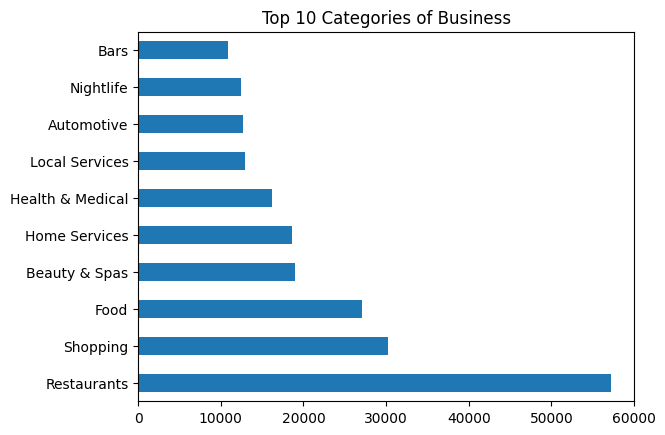

In [35]:
df_b_categories.value_counts()[:10].plot(kind='barh', title='Top 10 Categories of Business')


**(2) Find the most popular business objects** 
* print the top 10 most popular business objects/IDs in the dataset and their counts (i.e., how many checkins in total for each business object).  Here we say a business object is "popular" if the business object attracts a large number of checkins from the users.

In [36]:
# import required libraries
import pandas as pd

# load the dataset into a pandas DataFrame
df = pd.read_json("yelp_academic_dataset_checkin.json", lines=True)

# split the checkin_info column to get the checkin counts
checkin_counts = df["checkin_info"].apply(lambda x: sum(x.values()))

# add the checkin counts to the DataFrame
df["checkin_counts"] = checkin_counts

# group the businesses by their ID and sum their checkin counts
business_checkin_counts = df.groupby("business_id")["checkin_counts"].sum()

# sort the businesses by their checkin counts in descending order
business_checkin_counts = business_checkin_counts.sort_values(ascending=False)

# print the top 10 most popular businesses
print("Top 10 most popular businesses:")
print(business_checkin_counts.head(10))


Top 10 most popular businesses:
business_id
jf67Z1pnwElRSXllpQHiJg    77320
hW0Ne_HTHEAgGF1rAdmR-g    68711
3Q0QQPnHcJuX1DLCL9G9Cg    29893
AtjsjFzalWqJ7S9DUFQ4bw    27356
JpHE7yhMS5ehA9e8WG_ETg    18208
34uJtlPnKicSaX1V8_tu1A    18099
eWPFXL1Bmu1ImtIa2Rqliw    17671
-7yF42k0CcJhtPw51oaOqQ    17419
z3SyT8blMIhsZNvKJgKcRA    17161
2e2e7WgqU1BnpxmQL5jbfw    16641
Name: checkin_counts, dtype: int64


**(3) Other explorations you would like to present** 


In [37]:
print(business.head())

# display the number of rows and columns in the dataset
print("Number of rows: ", df_b.shape[0])
print("Number of columns: ", df_b.shape[1])

# display the data types of the columns
print(df_b.dtypes)

# display statistical summary of the numeric columns
print(df_b.describe())



              business_id                  name               neighborhood  \
0  Apn5Q_b6Nz61Tq4XzPdf9A  Minhas Micro Brewery                              
1  AjEbIBw6ZFfln7ePHha9PA   CK'S BBQ & Catering                              
2  O8S5hYJ1SMc8fA4QBtVujA         La Bastringue  Rosemont-La Petite-Patrie   
3  bFzdJJ3wp3PZssNEsyU23g       Geico Insurance                              
4  8USyCYqpScwiNEb58Bt6CA         Action Engine                              

               address       city state postal_code   latitude   longitude  \
0    1314 44 Avenue NE    Calgary    AB     T2E 6L6  51.091813 -114.031675   
1                       Henderson    NV       89002  35.960734 -114.939821   
2  1335 rue Beaubien E   Montréal    QC     H2G 1K7  45.540503  -73.599300   
3      211 W Monroe St    Phoenix    AZ       85003  33.449999 -112.076979   
4  2005 Alyth Place SE    Calgary    AB     T2H 0N5  51.035591 -114.027366   

   stars  review_count  is_open  \
0    4.0            24     

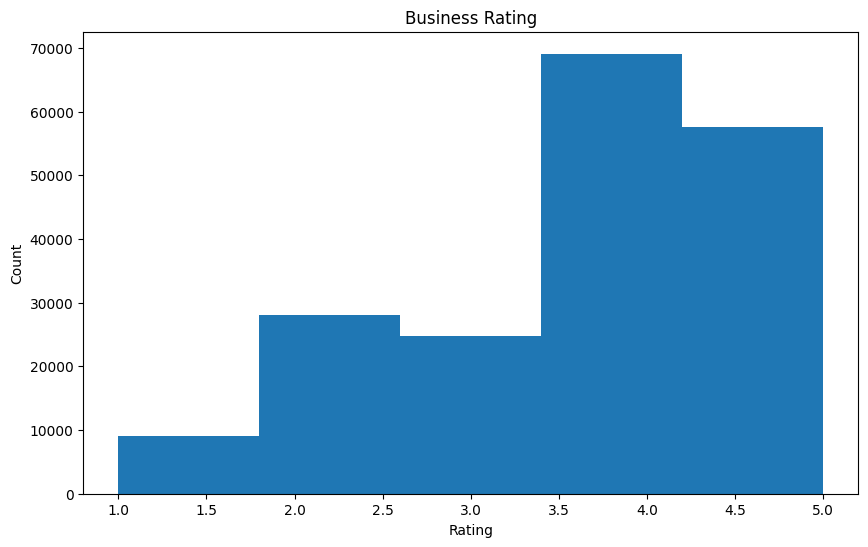

In [38]:
# plot a histogram of the business rating
df_b['stars'].plot(kind='hist', bins=5, figsize=(10, 6))
plt.title('Business Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

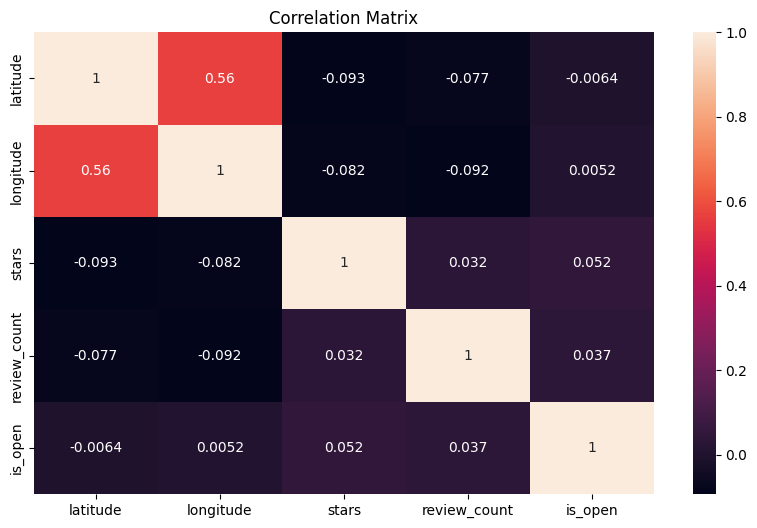

In [39]:
# compute the correlation matrix
corr_matrix = df_b.corr()
import seaborn as sns
# plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
plt.title('Correlation Matrix')
sns.heatmap(corr_matrix, annot=True)
plt.show()

# # perform feature engineering
# business['popularity'] = business['review_count'] + business['checkin_count']

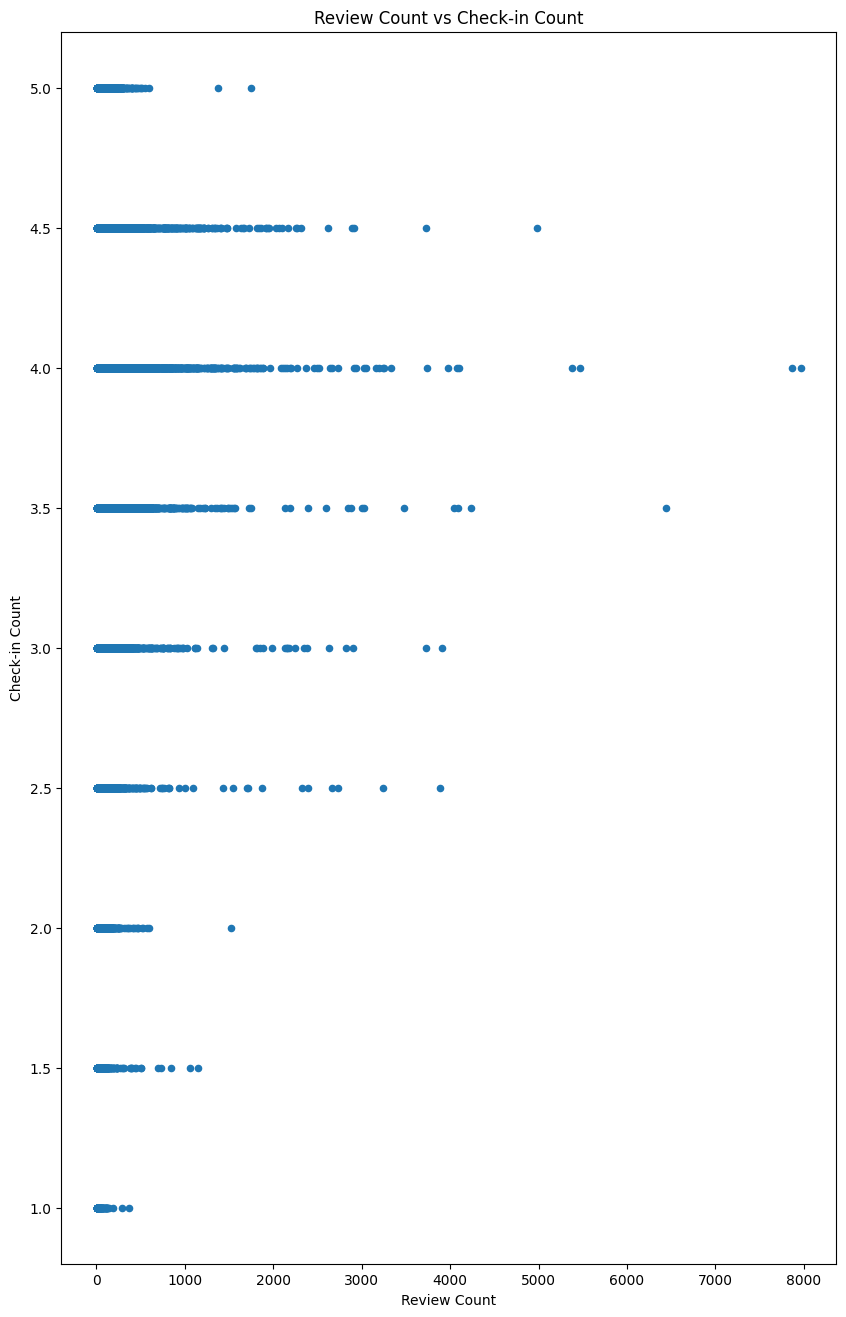

In [40]:
# plot a scatter plot of review count and check-in count
df_b.plot(kind='scatter', x='review_count', y='stars', figsize=(10, 16))
plt.title('Review Count vs Check-in Count')
plt.xlabel('Review Count')
plt.ylabel('Check-in Count')
plt.show()

# The Solution: implement a data science solution to the problem you are trying to solve.

Briefly describe the idea of your solution to the problem in the following cell:

One approach to analyzing the Yelp Business dataset of attributes is to use data visualization techniques to uncover patterns and insights. Visualizing the data can help us identify trends, outliers, and relationships between different attributes. Here I have used the following techniques of data visualizations to explore the Yelp Business dataset:

Scatterplots: Scatterplots can be used to visualize the relationship between two attributes, such as ratings and review count. Each data point represents a business, and its location on the plot corresponds to its value for the two attributes being compared. This can help us identify correlations and outliers.

Bar charts: Bar charts can be used to compare the frequency or distribution of different categories within a single attribute, such as the number of businesses in each category. This can help us identify which categories are most common or popular.

Heatmaps: Heatmaps can be used to visualize the relationship between two categorical attributes, such as the distribution of restaurant categories by location. This can help us identify which categories are most popular in different areas.

By using these and other data visualization techniques, we can gain valuable insights into the Yelp Business dataset and use this information to improve business performance, understand consumer behavior, and inform public policy.











Write codes to implement the solution in python:

In [44]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
df_b.dropna(inplace=True)

# Select relevant features
df_b_features = df_b[['stars', 'review_count','longitude','latitude']]

# Scale the data
scaler = StandardScaler()
df_b_business_features_scaled = scaler.fit_transform(df_b_features)


In [45]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(df_b_business_features_scaled)



KMeans(n_clusters=5, random_state=0)

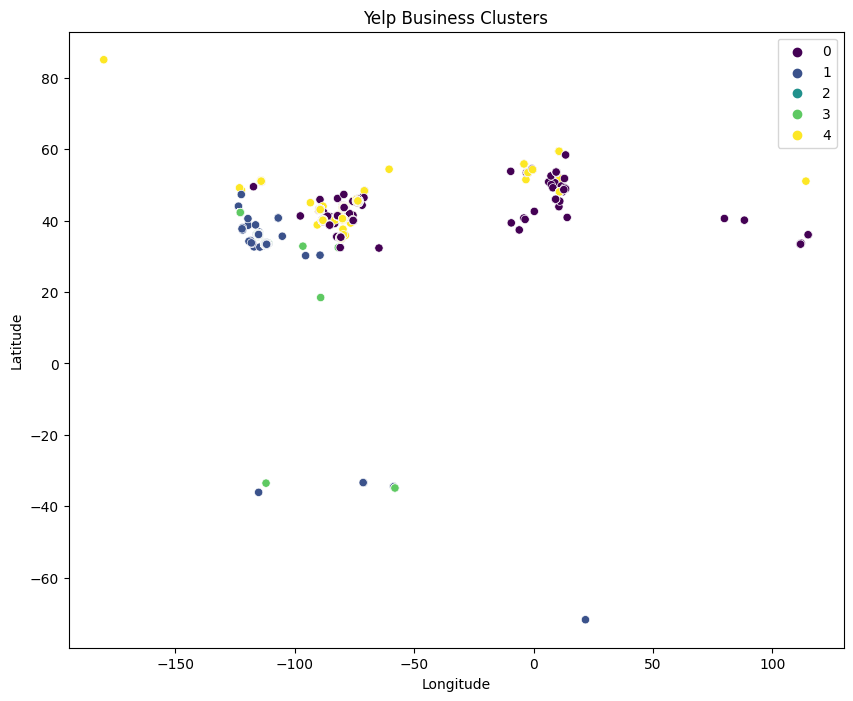

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the businesses on a map
plt.figure(figsize=(10,8))
sns.scatterplot(x=df_b['longitude'], y=df_b['latitude'], hue=kmeans.labels_, palette='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Yelp Business Clusters')
plt.show()

In [47]:
df_b['attributes'][1]


{'Alcohol': 'none',
 'BikeParking': 'False',
 'BusinessAcceptsCreditCards': 'True',
 'BusinessParking': "{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}",
 'Caters': 'True',
 'DogsAllowed': 'True',
 'DriveThru': 'False',
 'GoodForKids': 'True',
 'GoodForMeal': "{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfast': False, 'brunch': False}",
 'HasTV': 'False',
 'OutdoorSeating': 'True',
 'RestaurantsAttire': 'casual',
 'RestaurantsDelivery': 'False',
 'RestaurantsGoodForGroups': 'True',
 'RestaurantsPriceRange2': '2',
 'RestaurantsReservations': 'False',
 'RestaurantsTableService': 'False',
 'RestaurantsTakeOut': 'True',
 'WheelchairAccessible': 'True',
 'WiFi': 'no'}

In [48]:
rests = df_b[(df_b['is_open'] == 1)]

def get_rests_from_attributes(*args):
    partof_rests = pd.DataFrame({'business_id':rests['business_id'], 'name':rests['name'], 'stars':rests['stars']})
    def helper(attribute):
        attributes = []
        for a in rests['attributes']:
            if attribute in a.keys():
                attributes.append(a[attribute])
            else:
                attributes.append(None)
        return attributes

    for i in range(len(args)):
        attribute = args[i]
        partof_rests[attribute.lower()] = helper(attribute)
    
    return partof_rests


In [51]:
df_b['attributes'][1]


{'Alcohol': 'none',
 'BikeParking': 'False',
 'BusinessAcceptsCreditCards': 'True',
 'BusinessParking': "{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}",
 'Caters': 'True',
 'DogsAllowed': 'True',
 'DriveThru': 'False',
 'GoodForKids': 'True',
 'GoodForMeal': "{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfast': False, 'brunch': False}",
 'HasTV': 'False',
 'OutdoorSeating': 'True',
 'RestaurantsAttire': 'casual',
 'RestaurantsDelivery': 'False',
 'RestaurantsGoodForGroups': 'True',
 'RestaurantsPriceRange2': '2',
 'RestaurantsReservations': 'False',
 'RestaurantsTableService': 'False',
 'RestaurantsTakeOut': 'True',
 'WheelchairAccessible': 'True',
 'WiFi': 'no'}

In [52]:

def get_rests_from_attributes2(*args):
    partof_rests = pd.DataFrame({'business_id':rests['business_id'], 'name':rests['name'], 'stars':rests['stars']})
    def helper(attribute):
        attributes = []
        for a in rests['attributes']:
            if attribute in a.keys():
                attributes.append(a[attribute])
            else:
                attributes.append(None)
        return attributes

    for i in range(len(args)):
        attribute = args[i]
        partof_rests[attribute.lower()] = helper(attribute)
    
    return partof_rests


rests_meal = get_rests_from_attributes2('RestaurantsGoodForGroups')
rests_meal

,business_id,name,stars,restaurantsgoodforgroups
0,Apn5Q_b6Nz61Tq4XzPdf9A,Minhas Micro Brewery,4.0,True
4,8USyCYqpScwiNEb58Bt6CA,Action Engine,2.0,None
5,45bWSZtniwPRiqlivpS8Og,The Coffee Bean & Tea Leaf,4.0,None
8,8-NRKkPY1UiFXW20WXKiXg,Filiberto's Mexican Food,2.5,True
9,UTm5QZThPQlT35mkAcGOjg,Maggie & Stella's Gifts,3.5,None
...,...,...,...,...
188584,jYU4Nd71giCWpLuj5JIxgg,Aloha Nails,3.5,None
188585,Y_7sZoSLTJ-2mNZS8JS5Pg,Toronto Yoga Mamas,5.0,None
188590,KleCXFYOmdACcQUvf6_XEg,Walmart Supercenter,3.0,None
188591,3_fIsSxN2RBovQ_6EFtLzA,Residence Inn Charlotte Concord,4.0,None


# Results: summarize and visualize the results discovered from the analysis

Please use figures or tables to present the results.


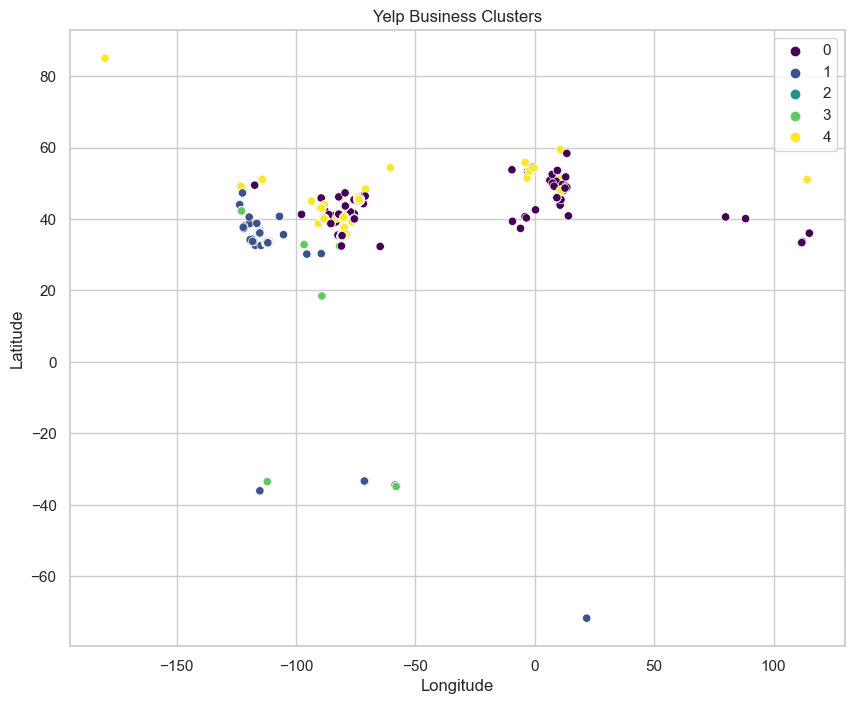

In [54]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the businesses on a map
plt.figure(figsize=(10,8))
sns.scatterplot(x=df_b['longitude'], y=df_b['latitude'], hue=kmeans.labels_, palette='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Yelp Business Clusters')
plt.show()






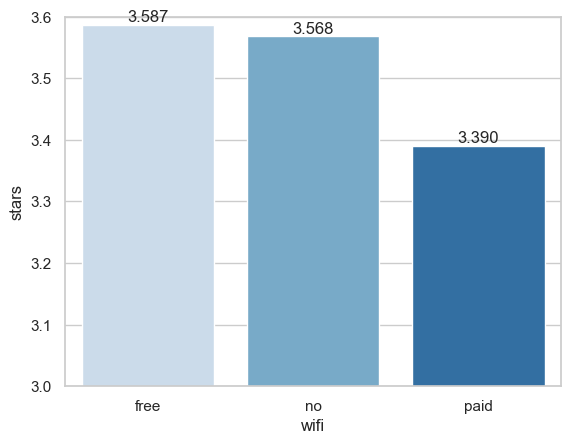

In [55]:
star_with_wifi = get_rests_from_attributes('WiFi').groupby(['wifi']).mean().reset_index()
sns.set(style="whitegrid")
ax = sns.barplot(x = 'wifi', y = 'stars', data = star_with_wifi, palette = 'Blues')
for patch in ax.patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    ax.annotate('{:.3f}'.format(y), (x.mean(), y), ha='center', va='bottom')
plt.ylim([3, 3.6]);

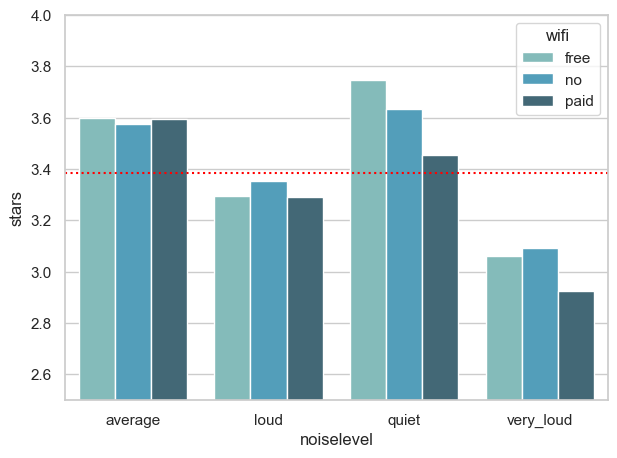

In [56]:
star_with_wifiandnoise = get_rests_from_attributes('NoiseLevel', 'WiFi').groupby(['noiselevel', 'wifi']).mean().reset_index()
f, ax = plt.subplots(figsize=(7, 5))
ax = sns.barplot(x = 'noiselevel', y = 'stars', hue = 'wifi', data = star_with_wifiandnoise, palette = 'GnBu_d')
ax.axhline(
    y=star_with_wifiandnoise['stars'].mean(), 
    color='red',
    linestyle='dotted'
)
plt.ylim([2.5, 4]);


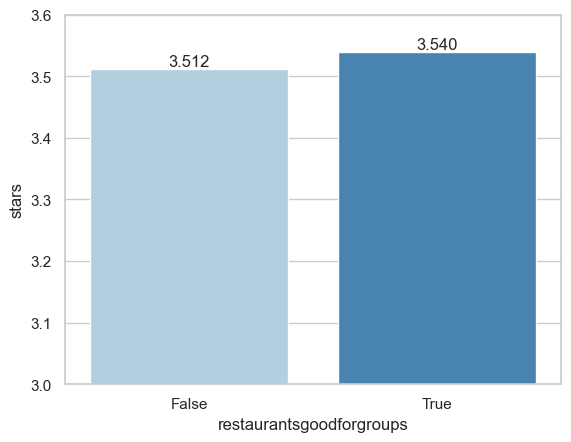

In [57]:
rests_meal = get_rests_from_attributes2('RestaurantsGoodForGroups').groupby(['restaurantsgoodforgroups']).mean().reset_index()
sns.set(style="whitegrid")
ax = sns.barplot(x = 'restaurantsgoodforgroups', y = 'stars', data = rests_meal, palette = 'Blues')
for patch in ax.patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    ax.annotate('{:.3f}'.format(y), (x.mean(), y), ha='center', va='bottom')
plt.ylim([3, 3.6]);

## Explanation:



K-means clustering is a popular unsupervised machine learning algorithm that can be used for clustering on the Yelp business dataset. In essence, the algorithm groups similar businesses together into clusters based on their features.

The Yelp business dataset contains several features that can be used for clustering, such as the business category, rating, review count, and location. By applying K-means clustering to these features, businesses that share similar characteristics can be grouped together.

The K-means algorithm works by randomly selecting K initial centroids and then iteratively assigning each business to the nearest centroid based on a distance metric, such as Euclidean distance. The algorithm then re-computes the centroid of each cluster and re-assigns the businesses to the nearest centroid. This process continues until convergence, i.e., the clusters no longer change.

Once the K-means algorithm has converged, the resulting clusters can be analyzed to gain insights into the Yelp business dataset. For example, businesses in the same cluster may share similar characteristics such as similar business categories or similar ratings. This information can be useful for businesses looking to improve their performance, as they can look at the most successful businesses in each cluster and learn from them.

Overall, K-means clustering is a powerful tool for exploring the Yelp business dataset and identifying patterns and insights that can help businesses improve their performance. However, it is important to keep in mind that the quality of the clustering results depends on the choice of K and the initial centroids, so it is important to experiment with different values of K and centroid initialization methods to find the best clustering solution.

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and submit it in BrightSpace. Please make sure all the plotted tables and figures are in the notebook. 